**3.	Which player has the highest number of wins?**

Importing required libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Reading requierd tables

In [2]:
MatchEventInfo = pd.read_csv( 'C:/Users/Maedeh/Desktop/TenisMatchPro/data/external/MatchEventInfo.csv')
MatchHomeTeamInfo = pd.read_csv( 'C:/Users/Maedeh/Desktop/TenisMatchPro/data/external/MatchHomeTeamInfo.csv')
MatchAwayTeamInfo = pd.read_csv( 'C:/Users/Maedeh/Desktop/TenisMatchPro/data/external/MatchAwayTeamInfo.csv')

**Calculating number of players'win**

droping duplicated data

In [3]:
MatchHomeTeamInfo_dd = MatchHomeTeamInfo.drop_duplicates (subset = 'match_id')
MatchAwayTeamInfo_dd = MatchAwayTeamInfo.drop_duplicates (subset = 'match_id')
MatchEventInfo_dd = MatchEventInfo.drop_duplicates (subset = 'match_id')

Merging the tables

In [4]:
merged_HW = MatchHomeTeamInfo_dd[['match_id' ,
                                  'player_id']].merge(MatchAwayTeamInfo_dd[['match_id' ,
                                                                            'player_id']],
                                                                             on ='match_id').drop_duplicates (subset = 'match_id')
merged_EHW = merged_HW[['match_id' ,
                        'player_id_x' , 'player_id_y']].merge(MatchEventInfo_dd[['match_id',
                                                                                 'winner_code']],
                                                                                  on ='match_id').drop_duplicates (subset = 'match_id')
merged_EHW = merged_EHW.dropna()
merged_EHW.head()

,match_id,player_id_x,player_id_y,winner_code
0,12260075,14486,254742,2.0
1,12260076,206570,90080,1.0
2,12260077,46391,275923,2.0
3,12260078,106755,275923,1.0
4,12260080,221012,57163,1.0


Mapping the winner_code values

In [5]:
merged_EHW['winner_id'] = merged_EHW.apply( lambda x : x['player_id_x']  if x['winner_code']==1 else x['player_id_y'] , axis = 1)

In [6]:
merged_EHW.head()

,match_id,player_id_x,player_id_y,winner_code,winner_id
0,12260075,14486,254742,2.0,254742.0
1,12260076,206570,90080,1.0,206570.0
2,12260077,46391,275923,2.0,275923.0
3,12260078,106755,275923,1.0,106755.0
4,12260080,221012,57163,1.0,221012.0


Creating a data frame to show the number of player's win

In [ ]:
player = pd.concat ([MatchHomeTeamInfo[['player_id', 'name']] , MatchAwayTeamInfo[['player_id', 'name']]]).drop_duplicates(subset = 'player_id')
player['no_win'] = 0
for no in player['player_id']:
    player['no_win'].loc[player['player_id'] == no] = merged_EHW['match_id'].loc[merged_EHW['winner_id'] == no].count()

In [8]:
player.head()

,player_id,name,no_win
0,14486,Nadal R.,1
1,206570,Sinner J.,3
2,46391,Struff J.,1
3,106755,Rublev A.,4
4,221012,Cerundolo F.,2


**Reporting the best player with the most wins**

In [11]:
best_win_no = player['no_win'].max()
best_winer_id = player['player_id'].loc[player['no_win'] == player['no_win'].max()].values[0]
best_winer_name = player['name'].loc[player['no_win'] == player['no_win'].max()].values[0]
print (f'The highest number of wins is {best_win_no} whitch is gained by {best_winer_name} with {best_winer_id} ID')


The highest number of wins is 17 whitch is gained by Uchijima M. with 253356 ID


Plotting the histogram of wins

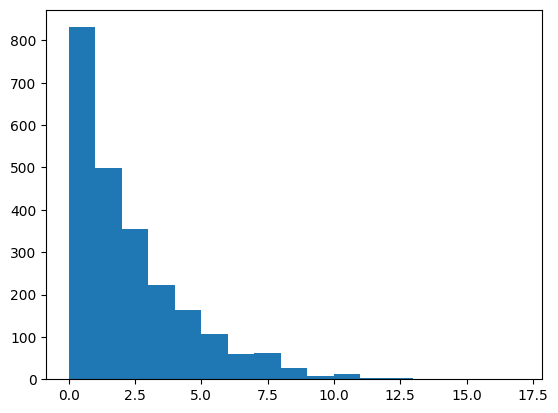

In [17]:
plt.hist(player['no_win'] , bins= 17)
plt.show()